In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing folium 
import folium
from folium.plugins import MiniMap

# <span style="color:black">**Folium Tutorial**</span> <img src="https://python-visualization.github.io/folium/latest/_images/folium_logo.png" alt="drawing" width="20"/>

## <span style="color:black">What is Folium </span>

**TL/DR;Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map**

- Library that combines data wrangling potential in Python and the mapping strengths of the Leaflet.js library
- Manipulate your data in Python  ➡️  visualize it in a Leaflet map via Folium
- What is Leaflet.js
   -  Open-source JavaScript library for mobile-friendly interactive maps
- What is JavaScript?
   - Scripting language that enhances web pages by allowing it to become more "interactive" and dynamic


In [2]:
map = folium.Map(location=(34.43027, -119.78804),zoom_start= 13)

kw = {
    "color": "blue",
    "line_cap": "round",
    "fill": True,
    "fill_color": "red",
    "weight": 1,
    "popup": "MEDS Daily Commute",
}

folium.Rectangle(
    bounds=[[34.41354, -119.86946], [34.41061, -119.68927], [34.44434, -119.76688],[34.3958, -119.71357]],
    line_join="mitter",
    dash_array="5, 5",
    **kw,
).add_to(map)

folium.CircleMarker(
    location=[34.41204, - 119.85606],
    radius=40,
    fill=True,
    popup=folium.Popup("IV Food Hot Spots"),
).add_to(map)

folium.Marker(
    location=[34.42279, -119.70187],
    popup=folium.Popup("NCEAS a.k.a 2nd Home"),
).add_to(map)

folium.CircleMarker(
    location=[34.41799, -119.85596],
    radius=40,
    fill=True,
    popup=folium.Popup("San Clemente"),
).add_to(map)

folium.Marker(
    location=[34.41816, -119.84986],
    popup=folium.Popup("Luna's Daily Swim"),
).add_to(map)

folium.Marker(
    location=[34.40980, -119.88088],
    popup=folium.Popup("Charlie's Surf Spot"),
).add_to(map)

folium.Marker(
    location=[34.407657631724206, -119.8516033479329],
    popup=folium.Popup("Mariam's favorite beach "),
).add_to(map)

folium.Marker(
    location=[34.41865, -119.69748],
    popup=folium.Popup("Our weekly Trivia Nights"),
).add_to(map)


MiniMap().add_to(map)

map 

## <span style="color:black">Where to find Folium:</span>


- [Github](https://github.com/python-visualization/folium) 
- [Webpage](https://python-visualization.github.io/folium/latest/index.html)

- [User Guide](https://python-visualization.github.io/folium/latest/user_guide.html)
- [Different Map Types](https://leaflet-extras.github.io/leaflet-providers/preview/)


## <span style="color:black">Who developed Folium? </span>
This package was developed by Rob Story, who has developed three other libraries, Folium being the most recent development.

## <span style="color:black">Why was Folium created? </span>
Folium was developed in order to enable easy data visualization with geospatial analysis. It helps make interactive geographic visualizations that can be shared as a website. Folium helps transform data in pandas into interactive Leaflet maps.

## <span style="color:black">Potential Use in Environmental Data Science </span>
Folium plays an important role in allowing the visualization of data. 

Examples of its usage are:


- Mapping carbon emissions across continents
- Earthquake data
- Map trajectories of airplane/flights
- Mapping air quality and pollutants
- Mapping hurricane paths
- Squirrel locations


Important Aesthetics: 

1. Vector Layers
- Circle: radius specified in meters (fixed position on map will not move)
- CircleMaker: radius specified in pixels
- PolyLine
- Rectangle
- Polygon
- ColorLine

2. Raster Layers
- Tiles
- ImageOverlay
- VideoOverlay 
- WmsTileLayer



## <span style="color:black"> Getting Started </span>

Folium can be installed in the bash terminal by typing

`conda install folium -c conda-forge`

Or in your Powershell command line

`conda install forge`

## <span style="color:black"> Tutorial Using Squirrel Dataset</span>

In [4]:
squirrel_pop = squirrel_census = pd.read_csv('../data/2018_squirrel_data.csv', index_col=5, parse_dates=True)

C:\Users\hvaqu\AppData\Local\Temp\ipykernel_10000\3477734588.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  squirrel_pop = squirrel_census = pd.read_csv('../data/2018_squirrel_data.csv', index_col=5, parse_dates=True)


### <span style = "color:black">  Mapping Squirrels According to Fur Color</span>

#### <span style= "color:black"> Exploratory Data Analysis</span>

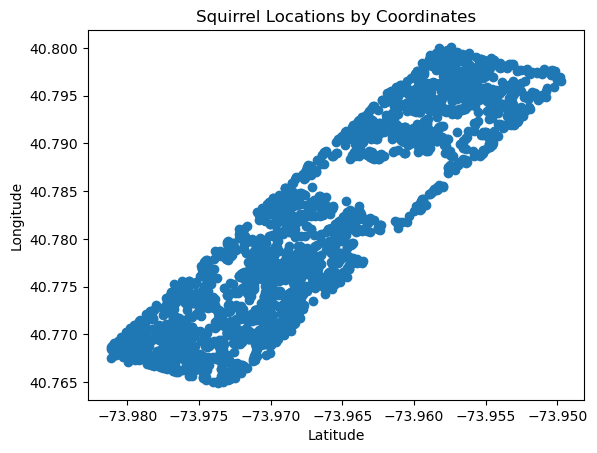

In [4]:
plt.scatter(squirrel_census.X, squirrel_census.Y)
plt.title("Squirrel Locations by Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

### <span style="color:black">Making Better Visuals using Folium</span>

In [6]:
import folium

# Create a map
map_1 = folium.Map(location=[40.781769, -73.966918], tiles='OpenStreetMap', zoom_start=14.25) # tiles = cartodb positron

# Get unique fur colors in the DataFrame
unique_fur_colors = squirrel_pop['Primary Fur Color'].unique()

# Define a color palette for each fur color (adjust as needed)
color_palette = {
    'Gray': '#808080',
    'Cinnamon': '#D27D2D',
    'Black': '#000000',
    'White': 'white',
    # Add more colors and fur color mappings as needed
}

# Iterate through unique fur colors and create map layers
for fur_color in unique_fur_colors:
    # Filter the DataFrame for the current fur color
    filtered_squirrels = squirrel_pop[squirrel_pop['Primary Fur Color'] == fur_color]

    # Create a map layer for the current fur color
    layer = folium.FeatureGroup(name=fur_color)

    # Add CircleMarkers for each squirrel of the current fur color
    for _, row in filtered_squirrels.iterrows():
        folium.CircleMarker(
            location=[row['Y'], row['X']],
            radius=5,
            color=color_palette.get(fur_color, 'White'),  # Default to white if color not found
            fill_color=(fur_color, 'red'),  # Default to white if color not found
            popup=f"Squirrel ID : {row['Unique Squirrel ID']}",
        ).add_to(layer)

    # Add the layer to the map
    layer.add_to(map_1)

# Add layer control for selecting fur colors
folium.LayerControl().add_to(map_1)

legendHtml = '''
     <div style="position: absolute; 
     top: 310px; left: 50px; width: 150px; height: 100px; 
     border:3px solid black; z-index:9999; font-size:14px;
     ">&nbsp; Squirrel Fur Color <br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#808080"></i> &nbsp; Gray<br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#D27D2D"></i> &nbsp; Cinnamon<br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#000000"></i> &nbsp; Black<br>             
      </div>
     '''

# inject html corresponding to the legend into the map
map_1.get_root().html.add_child(folium.Element(legendHtml))

# Display the map
map_1


### <span style = "color:black"> MarkerCluster</span>

In [14]:
## import MarketCluster plugin
from folium.plugins import MarkerCluster

# Get unique fur colors in the squirrel_pop data frame
unique_fur_colors = squirrel_pop['Primary Fur Color'].unique()

# A dictionary "color_palette" defines the maps unique fur color to their corresponding marker icon colors
color_palette = {
    'Gray': 'gray',
    'Cinnamon': 'orange',
    'Black': 'black',
    'White': 'white',
    # Add more fur colors and corresponding icon colors as needed
}
# Define a JavaScript function ('icon_create_function') that specifies how marker clusters should be displayed
# Also displays the number of markers within the cluster
icon_create_function = """\
function(cluster) {
    return L.divIcon({
    html: '<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconSize: new L.Point(20, 20)
    });
}"""

# Define Legend Html
legend_html = '''
<div style="position: fixed; 
            top: 10px; right: 10px; width: 150px; height: 120px; 
            background-color: white; border: 2px solid grey; z-index: 1000; font-size: 14px;
            ">
    <p><strong>Legend</strong></p>
    <p><i class="fa fa-circle" style="color: gray;"></i> Gray</p>
    <p><i class="fa fa-circle" style="color: orange;"></i> Cinnamon</p>
    <p><i class="fa fa-circle" style="color: black;"></i> Black</p>
    <p><i class="fa fa-circle" style="color: white;"></i> White</p>
    <!-- Add more legend entries for other fur colors as needed -->
</div>
'''
# Creates the folium map ('m') and here the type of background(tiles = ) and initial zoom can be set(zoom = )
# Position of the map is determined by setting the coordinates to the mean of the latitude and longitude
m = folium.Map(
    location=[np.mean(squirrel_pop.Y), np.mean(squirrel_pop.X)], tiles="CartoDB Positron", zoom_start=10
)

# Create a marker cluster layer for grouping markers 
marker_cluster = MarkerCluster(
    name='Squirrel sightings',
    overlay=True,
    control=False,
    icon_create_function=None
)

# Iterate throught data frame rows and add markers
for index, row in squirrel_pop.iterrows():
    location = [row['Y'], row['X']]
    squirrel_id = row['Unique Squirrel ID']
    fur_color = row['Primary Fur Color']
    popup=f"Squirrel ID : {row['Unique Squirrel ID']}" # sets the text for the icon popup

# Sets the icon color to fur_color dictionary
    icon_color = color_palette.get(fur_color,'red') # red is the default color in case the fur color is not found in the dictionary
    icon = folium.Icon(color = icon_color)
    
# Creates a marker with a popup and icon, then adds it to the cluster    
    marker = folium.Marker(location=location, popup= popup, icon = icon)
    marker_cluster.add_child(marker)

# Adds cluster to map
marker_cluster.add_to(m)
# Layer Control
folium.LayerControl().add_to(m)

# Display map
m



### <span style = 'color:black'> HeatMap</span>

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca
from collections import defaultdict

In [ ]:
earthquake_data = pd.read_csv("../data/Cali_earthquakes.csv")
earthquake_data= earthquake_data.dropna()

In [ ]:
earthquake_data.head()

In [ ]:
# Step 1: Determine vmin and vmax
vmin = earthquake_data[earthquake_data['magnitude'] > 5]['magnitude'].min() # find the smallest magnitude for color scale
vmax = earthquake_data[earthquake_data['magnitude'] > 5]['magnitude'].max()  # find the largest magnitude for color scale

# Step 2: Set up the colormap
steps =5
colors = ['#FFFFB2', '#FECC5C', '#FD8D3C', '#F03B20', '#BD0026'] # create list of colors to use
colormap = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(steps) # create color map that matches colors to values for legend bar

# Step 3: Create the gradient map
gradient_map = {} # define empty dictionary
for i, color in enumerate(colors): # iterate through color list
    gradient_map[i / (steps - 1)] = color # fill dictionary with colors and their corresponding value

# Step 4: Filter earthquake data and display the heatmap
heatmap_data = [
    [row['lat'], row['lon'], row['magnitude']] #heatmap data is a list of lists, containg latitude, then longitude, then magnitude for that specific location
    for _, row in earthquake_data.iterrows()  # iterate over rows that have a magnitude greater than 5
    if row['magnitude'] > 5
]

m = folium.Map(location=(36.7783, -119.4179), zoom_start=6) # starting location as California, zoomedin
plugins.HeatMap(heatmap_data, gradient=gradient_map).add_to(m) # add heatmap with color gradientmap dictionary defined above
colormap.add_to(m) #add the color map to the heat map # add gradient legend bar to map
m

### <span style = "color:black"> VideoOverlay</span>

In [20]:


m = folium.Map(location=[22.5, -115], zoom_start=4)

video = folium.raster_layers.VideoOverlay(
    video_url="https://www.mapbox.com/bites/00188/patricia_nasa.webm",
    bounds=[[32, -130], [13, -100]],
    opacity=0.65,
    attr="Video from patricia_nasa",
    autoplay=True,
    loop=False,
)

video.add_to(m)

m